In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Data**

In [2]:
df_train = pd.read_csv('train_ctrUa4K.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_test = pd.read_csv('test_lAUu6dG.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

(None, None)

# **Data Cleaning**

<span style="font-size:20px;font-weight:bold">1. Check duplicate values</span>

In [5]:
df_train.duplicated().sum()

0

In [6]:
df_test.duplicated().sum()

0

<span style="font-size:20px;font-weight:bold">2. Check missing values</span>

In [7]:
df_train_na = pd.DataFrame(df_train.isna().sum(), columns=['df_train'])
df_test_na = pd.DataFrame(df_test.isna().sum(), columns=['df_test'])
df_train_na.join(df_test_na).astype('Int64')

,df_train,df_test
Loan_ID,0,0
Gender,13,11
Married,3,0
Dependents,15,10
Education,0,0
Self_Employed,32,23
ApplicantIncome,0,0
CoapplicantIncome,0,0
LoanAmount,22,5
Loan_Amount_Term,14,6


<span style="font-size:20px;font-weight:bold">3. Fill missing values</span>

In [8]:
def fill_missing_values(df):
    df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
    df['Married'].fillna(df['Married'].mode()[0], inplace = True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
    df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
    df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
    df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
    return df

In [9]:
df_train = fill_missing_values(df_train)
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df_test = fill_missing_values(df_test)
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Data Visualization

<Axes: xlabel='Loan_Status', ylabel='count'>

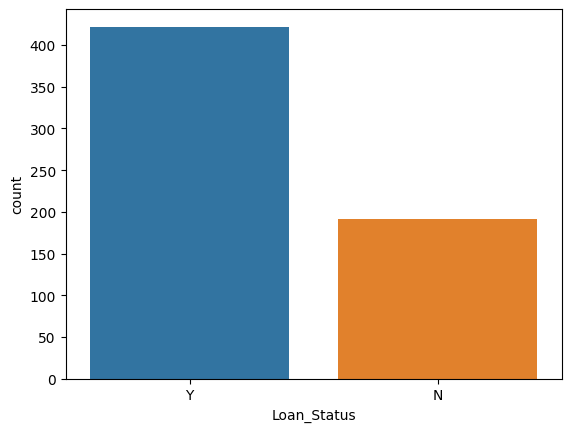

In [12]:
sns.countplot(x = 'Loan_Status', data = df_train)

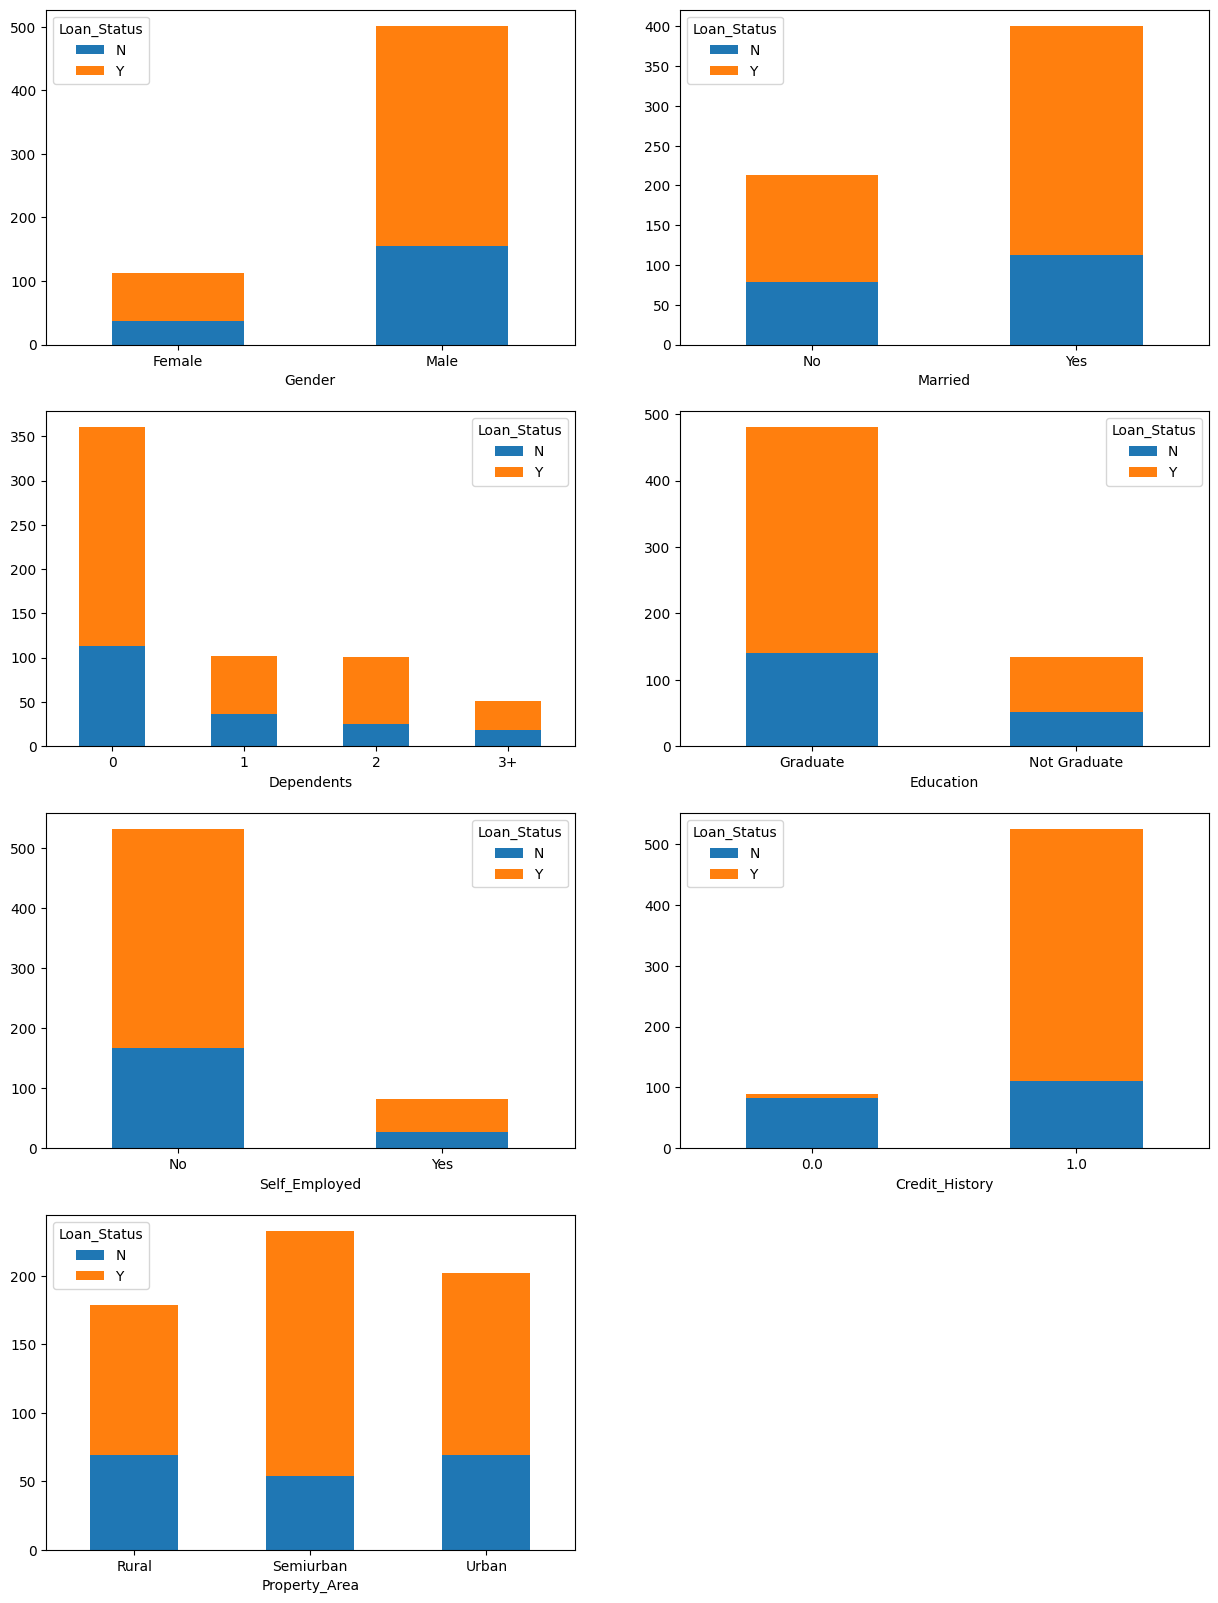

In [13]:
categorical_cols = ['Gender','Married','Dependents','Education', 'Self_Employed','Credit_History','Property_Area']

fig, axes = plt.subplots(4,2, figsize = (15,20))

# row index
i=0
# col index
j=0

for c in categorical_cols:
    pd.crosstab(df_train[c], df_train['Loan_Status']).plot.bar(stacked=True, rot=0, ax=axes[i,j])
    j+=1
    if j > 1:
        i+=1
        j=0

# remove extra empty plot in subplots
fig.delaxes(axes[3][1])

In [14]:
for c in categorical_cols:
    print(df_train[c].value_counts())
    

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


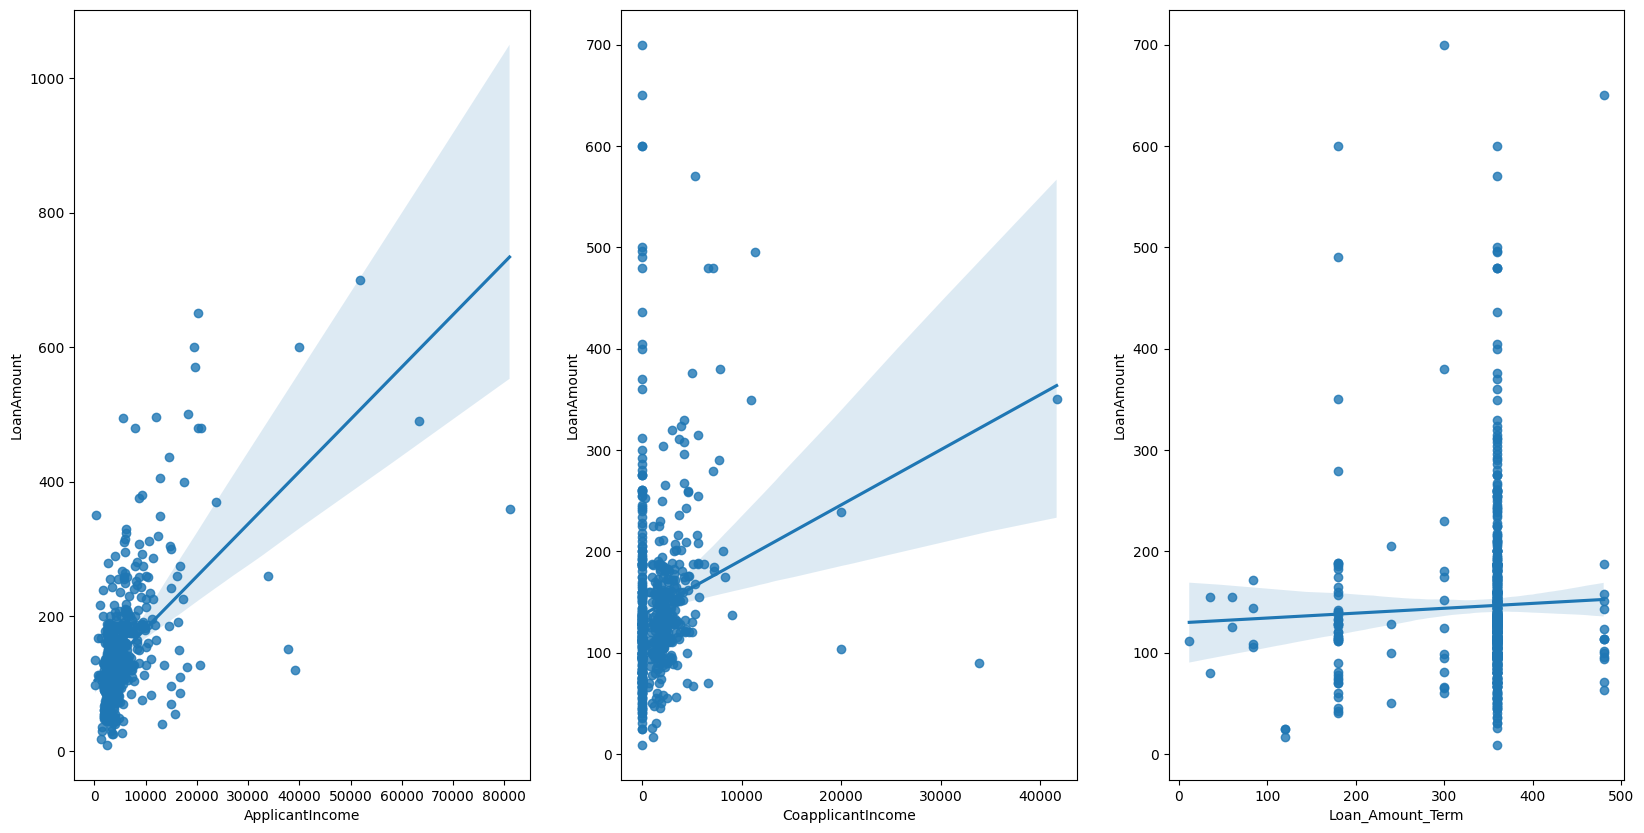

In [15]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
numerical_cols

fig, axes = plt.subplots(1,3, figsize =[20,10])

j = 0

for c in numerical_cols:
    sns.regplot(x = c, y ='LoanAmount', data= df_train, ax = axes[j])
    j+=1

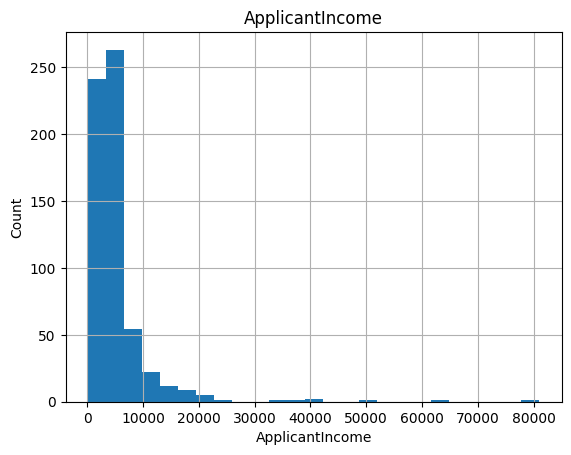

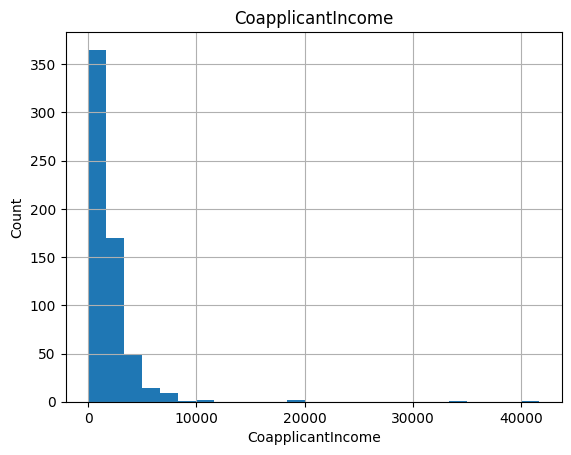

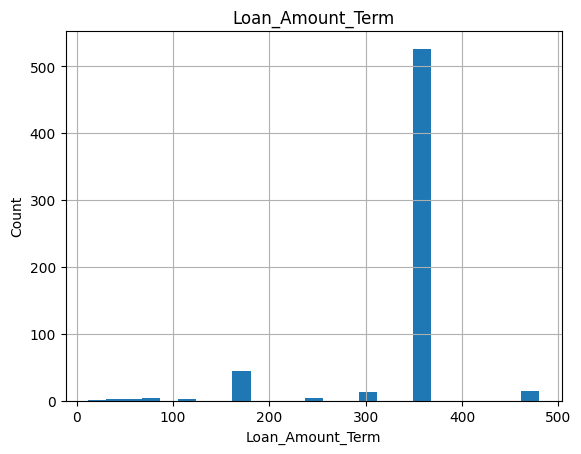

In [16]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
for feature in numerical_cols:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [17]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'N':0, 'Y':1})
sns.heatmap(df_train.corr(), annot = True, cmap ='GnBu')

ValueError: could not convert string to float: 'LP001002'

In [18]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# Data Preparation

In [19]:
from sklearn.preprocessing import StandardScaler
def df_for_regession(df):
    new_df = df.copy() 
    
    new_df = pd.get_dummies(new_df, columns = ['Gender','Married','Dependents','Education', 'Self_Employed','Property_Area'])
 
    new_df.drop(['Loan_ID','ApplicantIncome'], inplace = True, axis = 1)#ApplicantIncome is removed due to high correlation to loan amount
    num_df = df[[col for col in df.columns if df.dtypes[col] == 'float64'
                 or df.dtypes[col] == 'int64']]
    scaler = StandardScaler().fit(num_df)
    num_df = pd.DataFrame(scaler.transform(num_df), columns=num_df.columns)
    
    new_df
    
    return new_df

In [20]:
train_dataset = df_for_regession(df_train)
train_dataset

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,1,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,1508.0,128.0,360.0,1.0,0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,0.0,66.0,360.0,1.0,1,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2358.0,120.0,360.0,1.0,1,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,0.0,141.0,360.0,1.0,1,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
610,0.0,40.0,180.0,1.0,1,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False
611,240.0,253.0,360.0,1.0,1,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
612,0.0,187.0,360.0,1.0,1,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True


In [21]:
test_dataset = df_for_regession(df_test)
test_dataset.head(5)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,110.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True
1,1500,126.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
2,1800,208.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
3,2546,100.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
4,0,78.0,360.0,1.0,False,True,True,False,True,False,False,False,False,True,True,False,False,False,True


<Axes: >

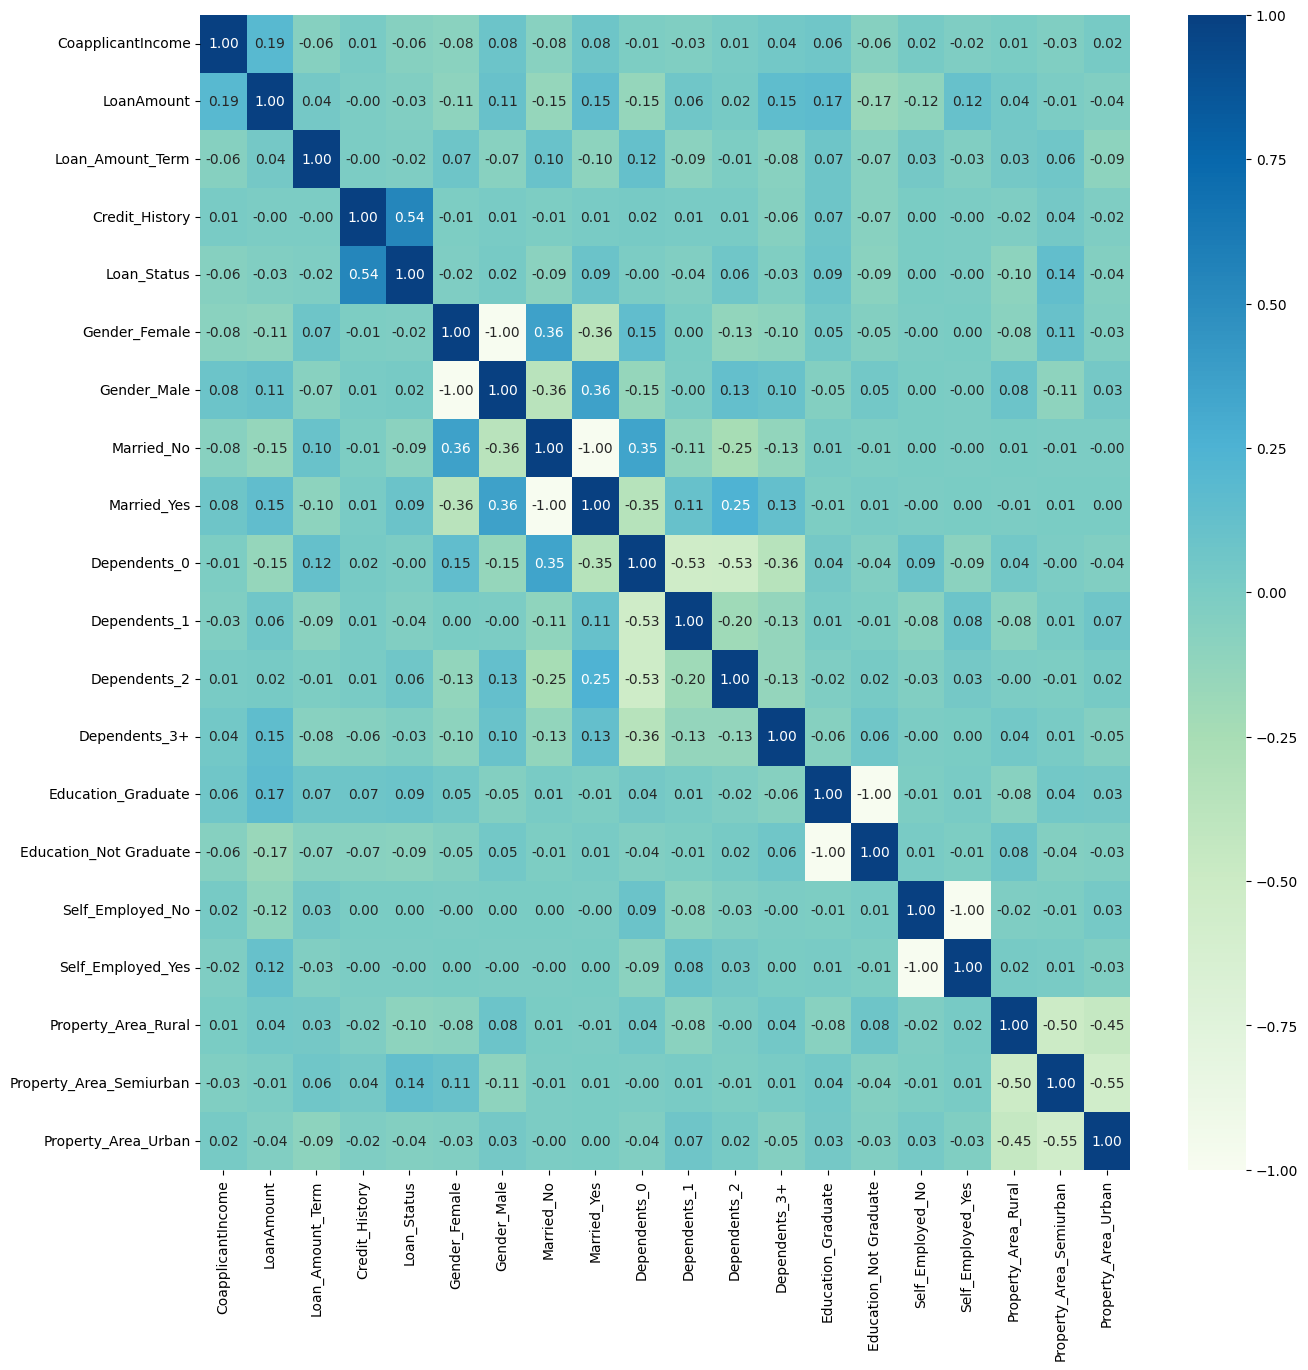

In [22]:
fig, ax = plt.subplots(figsize =(15,15))
sns.heatmap(train_dataset.corr(), annot = True, cmap ='GnBu', fmt='.2f')

# Logistic Regression

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
x = train_dataset.drop(['Loan_Status'],axis = 1)
y = train_dataset['Loan_Status']

In [25]:
x

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,1508.0,128.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2358.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,71.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
610,0.0,40.0,180.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False
611,240.0,253.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
612,0.0,187.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True


In [26]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=102)

In [28]:
logmodel  = LogisticRegression(max_iter=1000)
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100
acc_score

83.24324324324324

In [29]:
test_pred = logmodel.predict(test_dataset)

In [30]:
test_df_result = df_test.copy()
test_df_result['Loan Status'] = test_pred 
test_df_result

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,1


In [31]:
sample_df_result = pd.DataFrame(test_df_result[['Loan_ID', 'Loan Status']])
sample_df_result

,Loan_ID,Loan Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [32]:
sample_df_result['Loan Status'] = sample_df_result['Loan Status'].replace(1, 'Y')
sample_df_result['Loan Status'] = sample_df_result['Loan Status'].replace(0, 'N')

In [33]:
sample_df_result

,Loan_ID,Loan Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [34]:
sample_df_result = sample_df_result.rename(columns={'Loan Status': 'Loan_Status'})


In [37]:
sample_df_result.to_csv('/home/anrose/Desktop/result.csv', index=False)